## Change detection by Change vector analysis (CVA) Data analysis

The changes that appear in the difference image calculated in the previous section can be expressed as vectors in the two-dimensional space of HH/HV pairs for each pixel.The figure below shows an example where HV has decreased significantly while HH has decreased slightly. The following code cell calculates the length of the change vector at each pixel, expressed as magnitude, and the direction as angle.

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with rasterio.open('/home/jovyan/shared/PCN/ALOS-2/data/1-demo_data/2007HHcalibrated5_image.tif') as src:
    hh_2007_cal = src.read(1)
with rasterio.open('/home/jovyan/shared/PCN/ALOS-2/data/1-demo_data/2007HVcalibrated5_image.tif') as src:
    hv_2007_cal = src.read(1)
    
# Load ALOS-2 2010
with rasterio.open('/home/jovyan/shared/PCN/ALOS-2/data/1-demo_data/2010HHcalibrated5_image.tif') as src:
    hh_2010_cal = src.read(1)
with rasterio.open('/home/jovyan/shared/PCN/ALOS-2/data/1-demo_data/2010HVcalibrated5_image.tif') as src:
    hv_2010_cal = src.read(1)

In [3]:
delta_bandhv_cal = hv_2010_cal - hv_2007_cal
delta_bandhh_cal = hh_2010_cal - hh_2007_cal


In [4]:
magnitude = np.sqrt(delta_bandhv_cal**2 + delta_bandhh_cal**2)
angle = np.arctan2(delta_bandhv_cal, delta_bandhh_cal) #Radians: When using trigonometric functions like arctan or atan2, the default output is often in radians, where 00 to 2𝜋2π radians (approximately 00 to 6.286.28) covers the full circular range of angles.

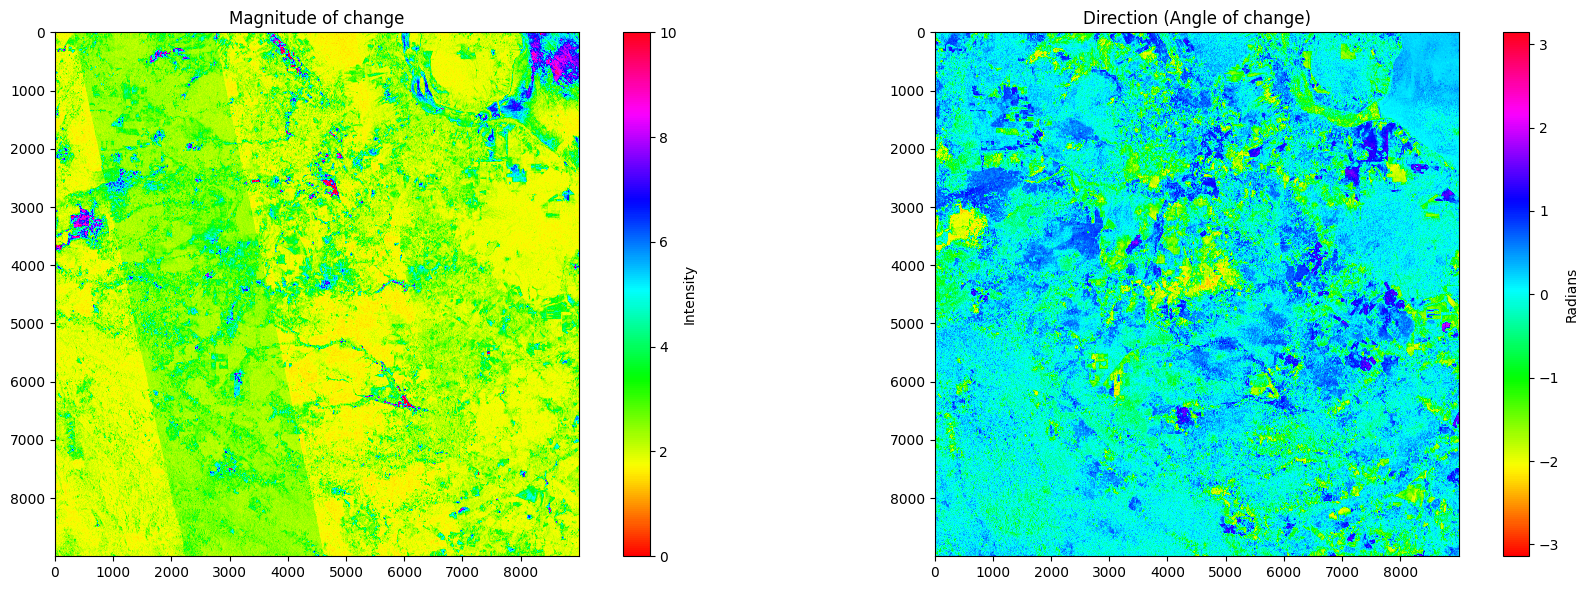

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

norm_magnitude = mcolors.Normalize(vmin=0, vmax=10)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

im1 = axs[0].imshow(magnitude, cmap='hsv', norm=norm_magnitude)
axs[0].set_title("Magnitude of change")
cbar1 = fig.colorbar(im1, ax=axs[0])
cbar1.set_label("Intensity")

im2 = axs[1].imshow(angle, cmap='hsv')
axs[1].set_title("Direction (Angle of change)")
cbar2 = fig.colorbar(im2, ax=axs[1])
cbar2.set_label("Radians")

plt.tight_layout()
plt.show()

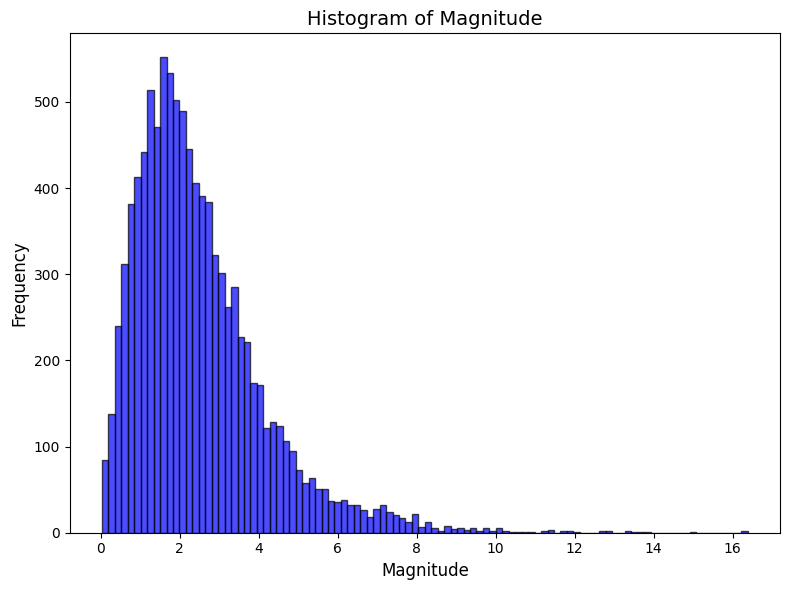

In [6]:
# Histograms

import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Generate and plot the histogram
data = np.random.choice(magnitude.ravel(), size=10000, replace=False)
ax.hist(data, bins=100, color='blue', edgecolor='black', alpha=0.7)

# Set plot title and labels
ax.set_title('Histogram of Magnitude', fontsize=14)
ax.set_xlabel('Magnitude', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

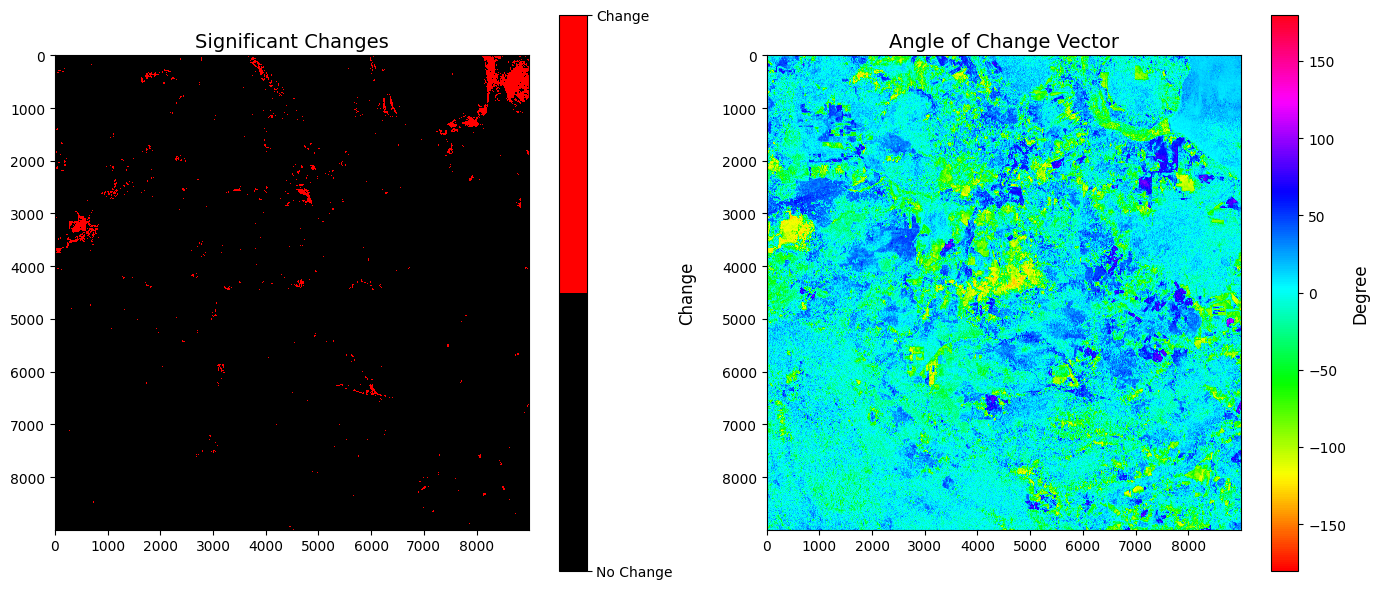

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Calculate the threshold for significant changes
threshold = np.mean(magnitude) + 2 * np.std(magnitude)
significant_change = np.where(magnitude > threshold, 1, 0)

# Define a discrete colormap for significant changes
cmap = ListedColormap(['black', 'red'])

# Create the subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot significant changes
im1 = axs[0].imshow(significant_change, cmap=cmap, origin='upper')
axs[0].set_title('Significant Changes', fontsize=14)

# Add a colorbar for significant changes
cbar1 = fig.colorbar(im1, ax=axs[0], ticks=[0, 1])
cbar1.ax.set_yticklabels(['No Change', 'Change'])
cbar1.set_label('Change', fontsize=12)

# Plot direction (angle of change)
im2 = axs[1].imshow(angle / 3.14 * 180, cmap='hsv', origin='upper')
axs[1].set_title("Angle of Change Vector", fontsize=14)

# Add a colorbar for direction
cbar2 = fig.colorbar(im2, ax=axs[1])
cbar2.set_label("Degree", fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()
